In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
import os
import glob
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('HousesDataset/HousesInfo.txt', header=None, sep=' ', names=['bedrooms', 'bathrooms', 'area', 'zipcode', 'price'])

In [3]:
data

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
...,...,...,...,...,...
530,5,2.0,2066,94531,399900
531,4,3.5,9536,94531,460000
532,3,2.0,2014,94531,407000
533,4,3.0,2312,94531,419000


In [4]:
data.index.values + 1

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [5]:
sorted(list(glob.glob(os.path.sep.join(['HousesDataset', "1_*".format(1)]))))

['HousesDataset\\1_bathroom.jpg',
 'HousesDataset\\1_bedroom.jpg',
 'HousesDataset\\1_frontal.jpg',
 'HousesDataset\\1_kitchen.jpg']

In [6]:
basepath = os.path.sep.join(['HousesDataset', "{}_*".format(1)])
imgPaths = sorted(list(glob.glob(basepath)))
inputImages = []
for imgPath in imgPaths:
    image = cv2.resize(cv2.imread(imgPath), (32, 32))
    inputImages.append(image)
np.shape(inputImages)

(4, 32, 32, 3)

In [7]:
images = []
for i in data.index.values:
    basepath = os.path.sep.join(['HousesDataset', "{}_*".format(i + 1)])
    imgPaths = sorted(list(glob.glob(basepath)))
    inputImages = []
    for imgPath in imgPaths:
        image = cv2.resize(cv2.imread(imgPath), (32, 32))
        inputImages.append(image)
    outputImage = np.zeros((64, 64, 3), dtype='uint8')
    outputImage[0:32, 0:32] = inputImages[0]
    outputImage[0:32, 32:64] = inputImages[1]
    outputImage[32:64, 32:64] = inputImages[2]
    outputImage[32:64, 0:32] = inputImages[3]
    images.append(outputImage)

In [8]:
images = np.array(images)
images.shape

(535, 64, 64, 3)

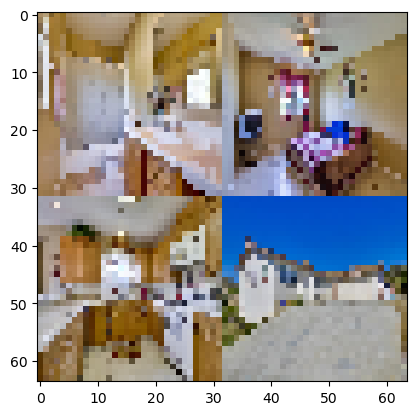

In [9]:
plt.imshow(images[100][..., ::-1])

In [10]:
X_train, X_test, IX_train, IX_test = train_test_split(data, images, random_state=523)

In [11]:
maxPrice = X_train['price'].max()
y_train = X_train['price'] / maxPrice
y_test = X_test['price'] / maxPrice

In [12]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import concatenate, Input, Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout, BatchNormalization

In [13]:
input1 = Input(shape=(64, 64, 3))
conv1 = Conv2D(16, (3, 3), padding='same', activation='relu')(input1)
batchnorm1 = BatchNormalization(axis=-1)(conv1)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
conv2 = Conv2D(32, (3, 3), padding='same', activation='relu')(maxpool1)
batchnorm2 = BatchNormalization(axis=-1)(conv2)
maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm2)
conv3 = Conv2D(64, (3, 3), padding='same', activation='relu')(maxpool2)
batchnorm3 = BatchNormalization(axis=-1)(conv3)
maxpool3 = MaxPooling2D(pool_size=(2, 2))(batchnorm3)
flatten1 = Flatten()(maxpool3)
dense1 = Dense(32, activation='relu')(flatten1)
batchnorm4 = BatchNormalization(axis=-1)(dense1)
dropout1 = Dropout(0.5)(batchnorm4)
dense2 = Dense(16, activation='relu')(dropout1)

In [14]:
m1 = Model(input1, dense2)

In [15]:
m1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128   

In [16]:
ss = StandardScaler()
XT = ss.fit_transform(X_train[['bedrooms', 'bathrooms', 'area']])
Xt = ss.transform(X_test[['bedrooms', 'bathrooms', 'area']])

In [17]:
lb = LabelBinarizer()
lb.fit(data['zipcode'])
XTz = lb.transform(X_train['zipcode'])
Xtz = lb.transform(X_test['zipcode'])

In [18]:
XTz[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [19]:
XT = np.hstack([XT, XTz])
Xt = np.hstack([Xt, Xtz])

In [20]:
XT[0]

array([0.51790082, 0.32814078, 0.36211477, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [21]:
XT.shape

(401, 52)

In [22]:
m2 = Sequential()
m2.add(Dense(16, activation='relu', input_dim=52))
m2.add(Dropout(0.5))
m2.add(Dense(8, activation='relu'))
m2.add(Dense(4, activation='relu'))

In [23]:
m2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                848       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
Total params: 1,020
Trainable params: 1,020
Non-trainable params: 0
_________________________________________________________________


In [24]:
combinedModel = concatenate([m2.output, m1.output])

In [25]:
densef1 = Dense(8, activation='relu')(combinedModel)
densef2 = Dense(1, activation='linear')(densef1)
model = Model(inputs=[m2.input, m1.input], outputs=densef2)

In [26]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 16)   448         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 16)  64          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 16)   0           ['batch_normalization[0][0]

In [27]:
from tensorflow.keras.utils import plot_model

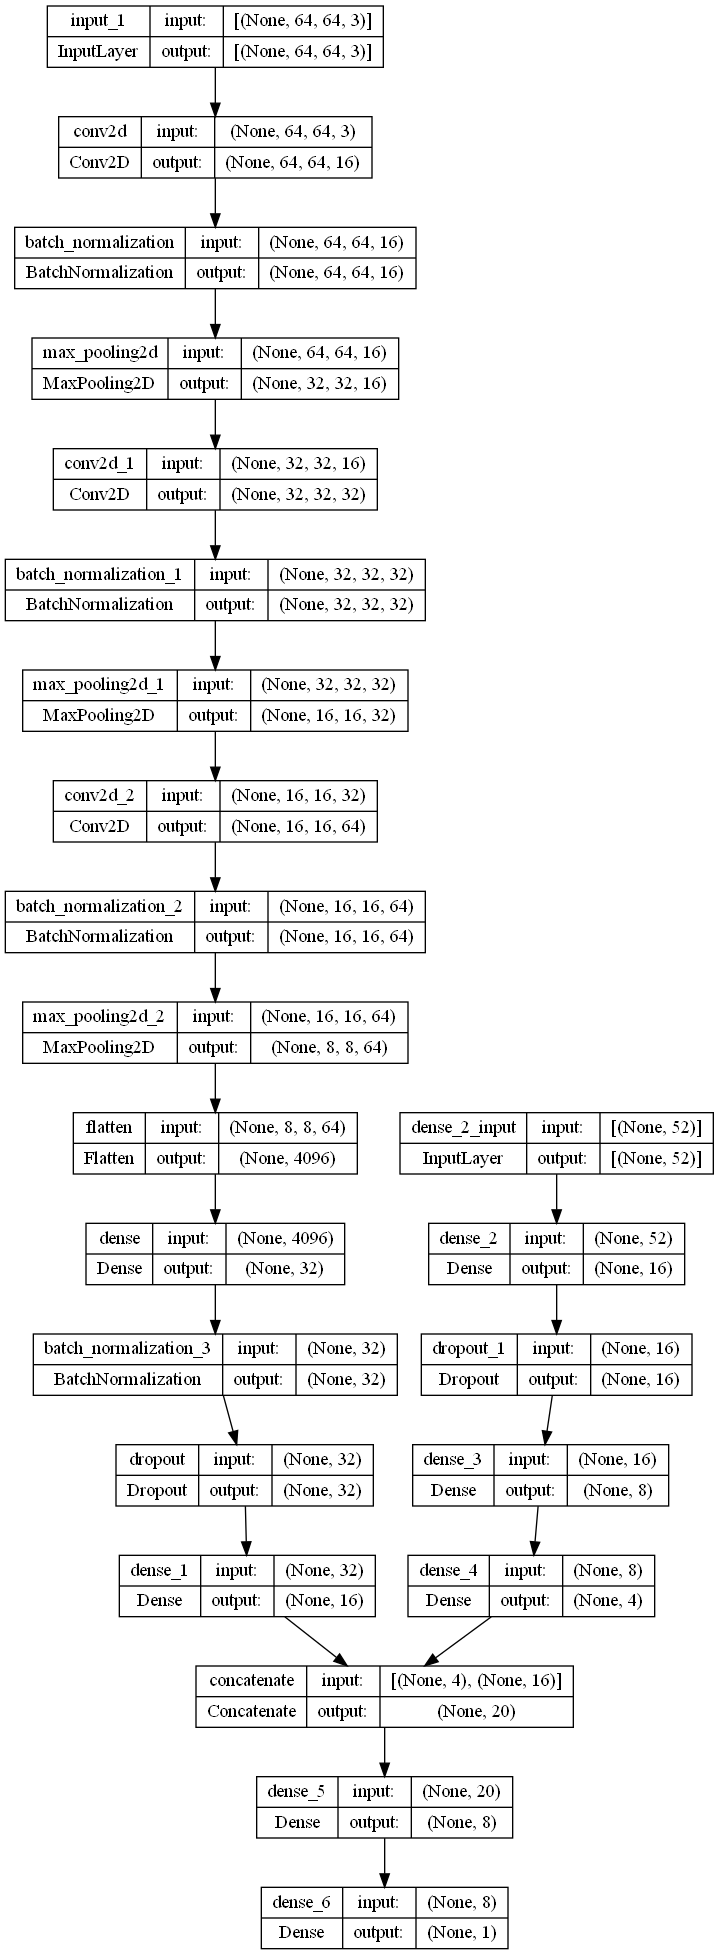

In [28]:
plot_model(model, show_shapes=True)

In [29]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [30]:
model.fit([XT, IX_train], y_train, validation_data=([Xt, IX_test], y_test), epochs=100, batch_size=10)

Epoch 1/100
41/41 [==============================] - 19s 449ms/step - loss: 0.2875 - val_loss: 0.3871
Epoch 2/100
41/41 [==============================] - 18s 432ms/step - loss: 0.1495 - val_loss: 0.1030
Epoch 3/100
41/41 [==============================] - 18s 438ms/step - loss: 0.1063 - val_loss: 0.0984
Epoch 4/100
41/41 [==============================] - 18s 437ms/step - loss: 0.0959 - val_loss: 0.0867
Epoch 5/100
41/41 [==============================] - 19s 464ms/step - loss: 0.0896 - val_loss: 0.0839
Epoch 6/100
41/41 [==============================] - 18s 449ms/step - loss: 0.0813 - val_loss: 0.0783
Epoch 7/100
41/41 [==============================] - 19s 459ms/step - loss: 0.0746 - val_loss: 0.0751
Epoch 8/100
41/41 [==============================] - 19s 460ms/step - loss: 0.0746 - val_loss: 0.0737
Epoch 9/100
41/41 [==============================] - 19s 455ms/step - loss: 0.0713 - val_loss: 0.0721
Epoch 10/100
41/41 [==============================] - 19s 465ms/step - loss: 0.066

In [31]:
predicts = model.predict([Xt, IX_test]) * maxPrice

5/5 [==============================] - 0s 10ms/step


In [32]:
predicts.flatten()

array([ 813190.2217865 ,  479445.39785385,  233668.14851761,
        517605.84115982,  475939.33343887,  660313.01021576,
        112116.17290974,  110884.01079178,  796596.40789032,
        534335.49404144,  333725.81005096,  650085.09159088,
        109365.32914639,  437612.80179024,  145068.70508194,
        461295.24707794,  598027.82535553,  245821.37167454,
        524921.05960846,  118811.5477562 , 1405163.52653503,
       1233155.60817719,  462169.70682144,  498471.2600708 ,
        951737.64228821,  364012.24136353,  506579.39910889,
        437970.37005424,  486968.30868721,  105386.27207279,
       1088735.22281647,  332665.80104828,  442091.40539169,
        429183.72154236,  515532.01675415,  659440.81544876,
        456419.52753067,   86112.55884171,  548764.2288208 ,
        488574.14722443,  157583.9817524 ,  160933.73298645,
        391912.57953644,  487828.88054848, 1056303.50112915,
        952590.94238281,  429261.41619682, 1337189.43595886,
        386305.98783493,

In [33]:
y_test.values * maxPrice

array([1039000.,  529800.,  184900.,  569950.,  309900.,  529000.,
         99000.,   69900., 1495000.,  557000.,  335000.,  547900.,
         74900.,  144900.,  117500.,  399900.,  455000.,  214900.,
        699000.,  104900.,  869000., 3850000., 5858000.,  499000.,
        895000.,  219500.,  599500.,  449000.,  500000.,  103500.,
        519200.,  664900.,  538000.,  449000.,  599999.,  649000.,
        310000.,   69500.,  479000.,  435000.,   97500.,  400000.,
        360000.,  567000., 1039000., 1327685.,  619000., 2150000.,
        458000.,  445000.,  629000.,  649000.,  549950.,  539900.,
        599999.,  695000.,  147000.,  310000.,  599000.,  385000.,
        259000.,  700000., 1195000.,  429900.,  639000.,  245000.,
        525000.,  710000.,  579000.,  925000.,  644900.,  895000.,
        750000.,  549999.,  625000.,  117000.,  962500.,  521500.,
        235000., 1500000.,   69900.,  135000.,  725000.,  529999.,
        389900.,  365000., 1299000., 1294000.,  530000.,  5348

In [34]:
diff = abs(predicts.flatten() - (y_test * maxPrice))

In [35]:
diff

11     225809.778214
81      50354.602146
75      48768.148518
524     52344.158840
436    166039.333439
           ...      
430    149657.695198
92     354819.444656
141     96814.532280
244     30457.329559
486     45236.253738
Name: price, Length: 134, dtype: float64

In [36]:
diff.mean()

186939.72341885496

In [37]:
data['price'].mean()

589362.8112149533

In [38]:
data['price'].std()

509026.06764905644

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error

In [40]:
r2_score(y_pred=predicts.flatten(), y_true=(y_test * maxPrice))

0.25078453759425

In [41]:
abs(model.predict([Xt, IX_test]).flatten() - y_test).mean() * maxPrice

5/5 [==============================] - 0s 6ms/step


186939.723418855

In [ ]:
# MasoudKaviani.ir
# Dataset: https://github.com/emanhamed/Houses-dataset